0.5640020910927576


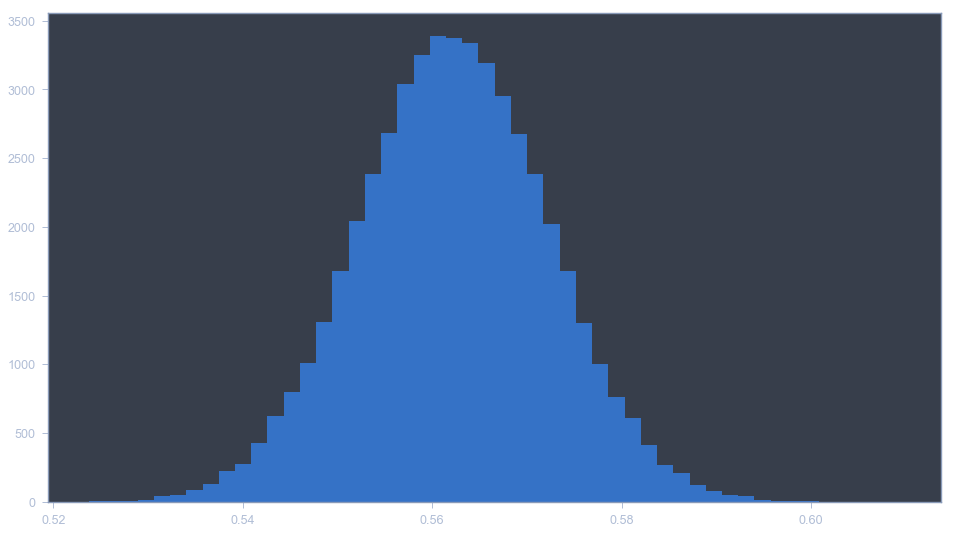

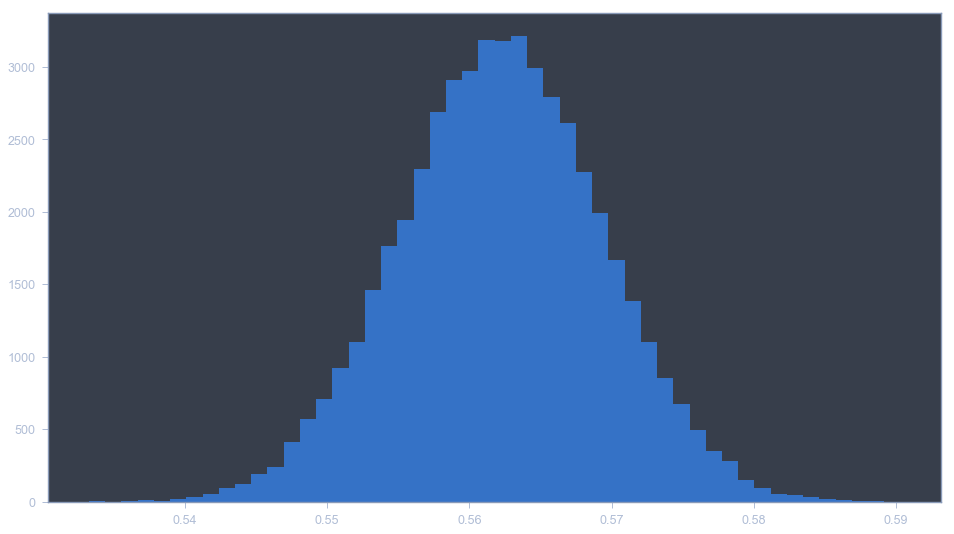

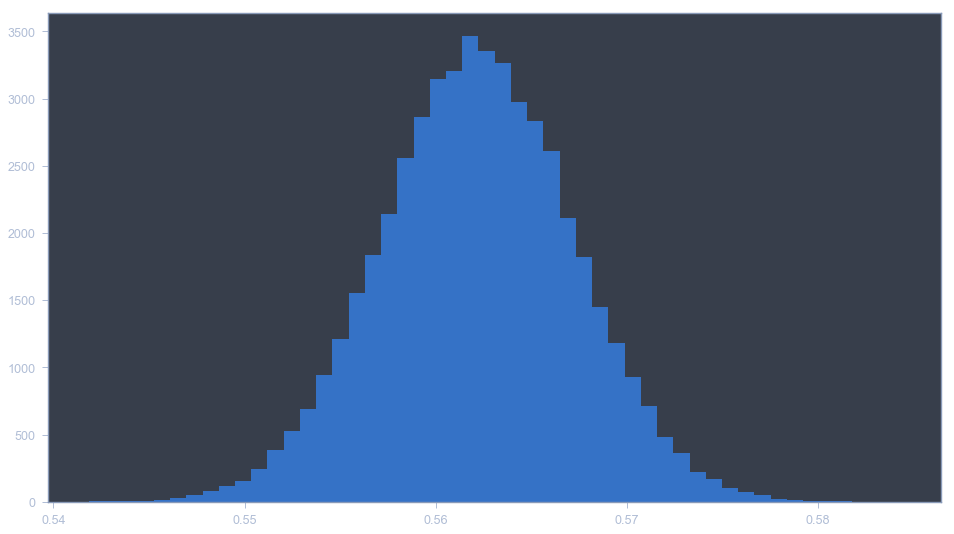

In [11]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def monteCarlo3D(func, N, Vol):
    I= 0.0
    r= np.random.rand(N,3)
    for t in range(0,N):
        I+= func(r[t])
    return I*Vol/N
    
def f(uArray): #uArray[0]==x, uArray[1]==y, etc
    return np.sin(uArray[0]*(uArray[1]+2*uArray[2]))

print(monteCarlo3D(f, 10000, 1))

Nvals= [1000, 2000, 4000]
M= 50000
for N in Nvals:
    u= np.empty(M)
    for k in range(0,M):
        u[k]=monteCarlo3D(f, N, 1)
    plt.figure(N, figsize=[16,9])
    plt.hist(u, 50)

0 % done for d=  2
1 % done for d=  2
2 % done for d=  2
3 % done for d=  2
4 % done for d=  2
5 % done for d=  2
6 % done for d=  2
7 % done for d=  2
8 % done for d=  2
9 % done for d=  2
10 % done for d=  2
11 % done for d=  2
12 % done for d=  2
13 % done for d=  2
14 % done for d=  2
15 % done for d=  2
16 % done for d=  2
17 % done for d=  2
18 % done for d=  2
19 % done for d=  2
20 % done for d=  2
21 % done for d=  2
22 % done for d=  2
23 % done for d=  2
24 % done for d=  2
25 % done for d=  2
26 % done for d=  2
27 % done for d=  2
28 % done for d=  2
29 % done for d=  2
30 % done for d=  2
31 % done for d=  2
32 % done for d=  2
33 % done for d=  2
34 % done for d=  2
35 % done for d=  2
36 % done for d=  2
37 % done for d=  2
38 % done for d=  2
39 % done for d=  2
40 % done for d=  2
41 % done for d=  2
42 % done for d=  2
43 % done for d=  2
44 % done for d=  2
45 % done for d=  2
46 % done for d=  2
47 % done for d=  2
48 % done for d=  2
49 % done for d=  2
50 % done 

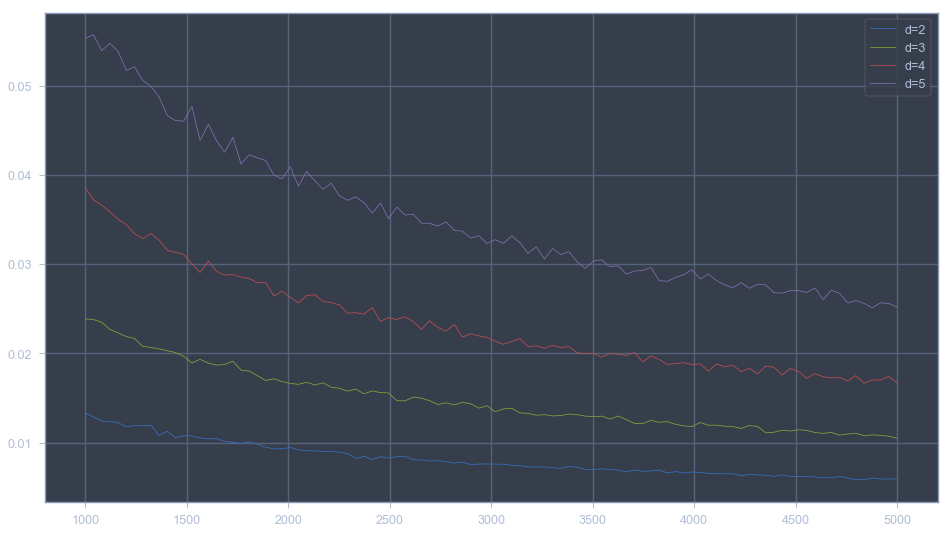

'Ja, der code braucht etwas mehr als 2 stunden zum ausführen...'

In [13]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.special import gamma

def monteCarloXD(func, N, dim, Vol):
    I= 0.0
    r= np.random.rand(N,dim)*2-1 #for integration boundaries, should rather be determined via arguments
    for t in range(0,N):
        I+= func(r[t])
    return I*Vol/N

def f(r):
    if np.sqrt(np.sum(np.power(r, 2))) <=1:
        return 1.0
    else:
        return 0.0

def V_e(d):
    """ Exakte Loesung des Volumenintegrals von f in d Dimensionen """
    return (np.power(np.pi, d/2)/gamma((d/2)+1))

def DI(I, d):
    return np.abs(I-V_e(d))

def Dr(M, N, d):
    dr= 0.0
    for i in range(0,M):
        dr+=DI(monteCarloXD(f, N, d, 2**d), d)
    return dr/(V_e(d)*M)

M=2000
plt.figure(0, figsize=[16,9])
for d in [2, 3, 4, 5]:
    Nvals= np.linspace(1000, 5000, 100, dtype=int)
    erg= np.empty(100)
    for n in range(0,100):
        erg[n]= Dr(M, Nvals[n], d)
        print(n,"% done for d= ", d)
    plt.plot(Nvals, erg, label= "d="+str(d))
    print("d= ",d, "done!")
plt.grid()
plt.legend()
plt.show()
"""Ja, der code braucht etwas mehr als 2 stunden zum ausführen..."""

In [9]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

executeAllSubExercises= False

N= 10**6
h= 2
xStart=0.5

def w(x):
    return 1/np.sqrt(np.pi)*np.exp(-np.power(x, 2))

def metropolis(x, w, h, xStart):
    x[0]= xStart
    a= 0
    for i in range(1, x.shape[0]):
        xnew= (np.random.rand()*2-1)*h+x[i-1]
        if w(xnew)/w(x[i-1])<np.random.rand():
            x[i]=x[i-1]
        else:
            x[i]= xnew
            a+=1
    return x, a

def metropolisAccept(x, w, h, xStart):
    x[0]= xStart
    for i in range(1, x.shape[0]):
        ann= True
        while ann:
            xnew= (np.random.rand()*2-1)*h+x[i-1]
            if w(xnew)/w(x[i-1])>=np.random.rand():
                x[i]= xnew
                ann= False
    return x

if executeAllSubExercises:
    #a
    plt.figure(0,figsize=[16,9])
    X, a = metropolis(np.empty(N), w, h, xStart)
    plt.hist(X, bins=50);
    #b
    plt.figure(1, figsize=[16,9])
    H= np.linspace(0.1, 5, 50)
    Ann= []
    N= 10**5
    for h in H:
        X, a= metropolis(np.empty(N), w, h, xStart)
        Ann.append(a/N)
    plt.plot(H, Ann)
    #c
    N= 10**6
    h= 2
    
    plt.figure(0,figsize=[16,9])
    X = metropolisAccept(np.empty(N), w, h, xStart)
    plt.hist(X, bins=50);

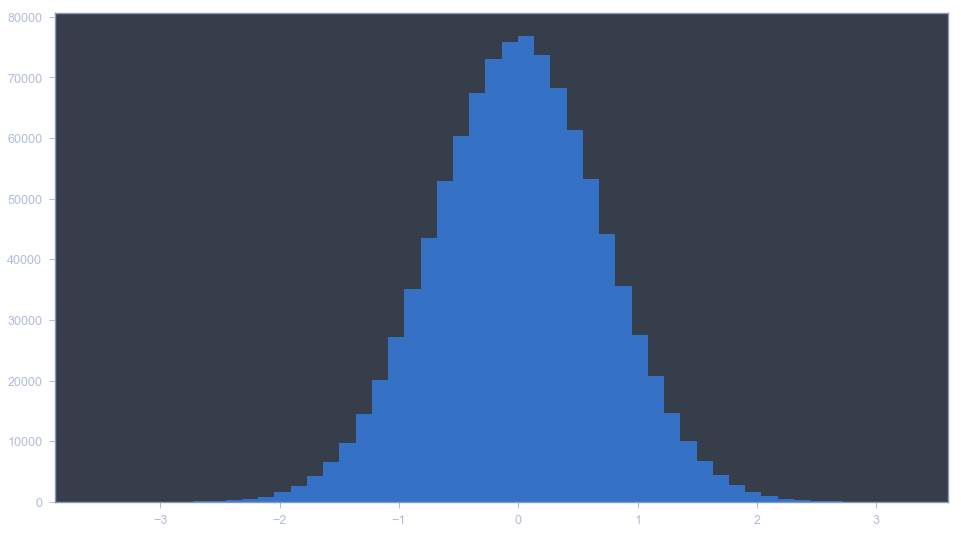

In [3]:
#teil a
N= 10**6
h= 2
xStart=0.5

plt.figure(0,figsize=[16,9])
X, a = metropolis(np.empty(N), w, h, xStart)
plt.hist(X, bins=50);

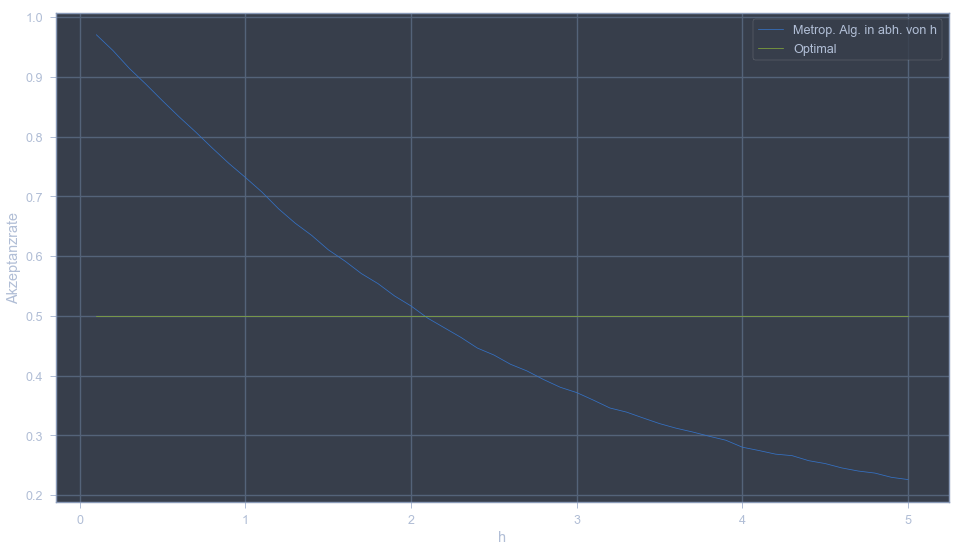

In [4]:
#teil b
xStart=0.5

plt.figure(1, figsize=[16,9])
H= np.linspace(0.1, 5, 50)
Ann= []
N= 10**5
for h in H:
    X, a= metropolis(np.empty(N), w, h, xStart)
    Ann.append(a/N)
plt.plot(H, Ann, label="Metrop. Alg. in abh. von h")
plt.plot([0.1, 5.0],[0.5, 0.5], label="Optimal")
plt.xlabel('h')
plt.ylabel('Akzeptanzrate')
plt.grid()
plt.legend()

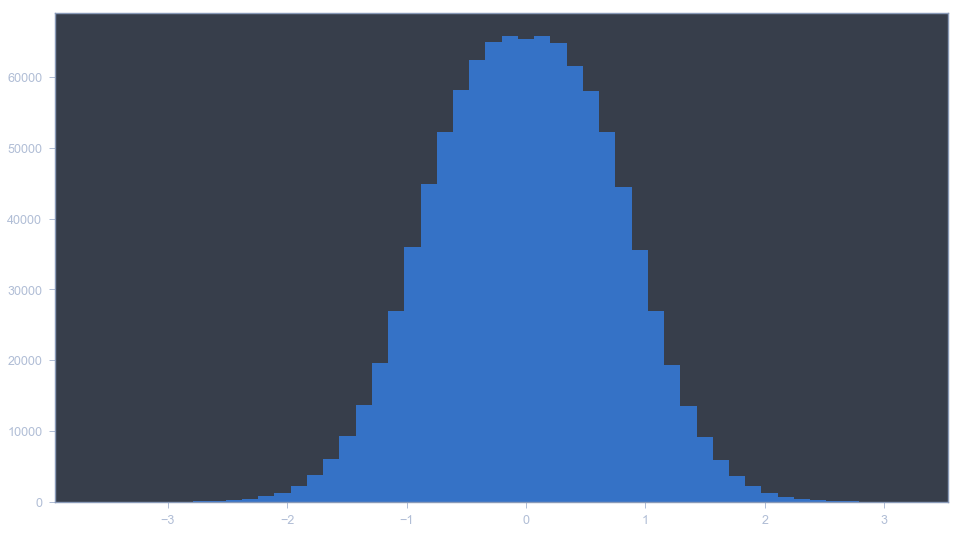

In [10]:

N= 10**6
h= 2
xStart=0.5

plt.figure(0,figsize=[16,9])
X = metropolisAccept(np.empty(N), w, h, xStart)
plt.hist(X, bins=50);